In [3]:
# importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
df = pd.read_csv("data/train (1).csv")

print("# ---- All Columns ---- #")
df.head()

# Checking NaN dist

df.isna().sum()

# 5080 samples... Will be training the model on the original df w/ 7613 samples & the location & kw columns dropped vs 5080 samples & location & kw included
df = df.drop(columns=['keyword', 'location', 'id'])

print("# ---- Text and Target Columns Only ----- #")
df.head()

# ---- All Columns ---- #
# ---- Text and Target Columns Only ----- #


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# ---- Distribution of True/False Values ---- #


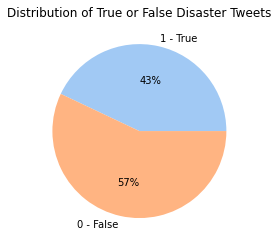

In [5]:
print("# ---- Distribution of True/False Values ---- #")

colors = sns.color_palette('pastel')[0:2]

plt.pie([sum(df['target'].values == 1), sum(df['target'].values == 0)], labels= ["1 - True", "0 - False"], colors=colors, autopct='%.0f%%', radius =1)
plt.title("Distribution of True or False Disaster Tweets")
plt.show()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["hiii there", "my name is", "lol thats not funny"]
cv = CountVectorizer
X = cv.fit_transform(corpus)
print(X)


TypeError: fit_transform() missing 1 required positional argument: 'raw_documents'